In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d cherryshad0/arasl-database-54k-final


Dataset URL: https://www.kaggle.com/datasets/cherryshad0/arasl-database-54k-final
License(s): CC0-1.0
 96% 56.0M/58.6M [00:04<00:00, 19.8MB/s]
100% 58.6M/58.6M [00:05<00:00, 12.3MB/s]


In [ ]:
!unzip /content/arasl-database-54k-final.zip

Streaming output truncated to the last 5000 lines.
  inflating: ArASL_Database_54K_Final/thal/THAL (1558).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1559).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (156).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1560).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1561).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1562).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1563).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1564).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1565).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1566).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1567).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1568).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1569).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (157).jpg  
  inflating: ArASL_Database_54K_Final/thal/THAL (1570).jpg  
  inflating: ArASL_Database_54K_Fina

In [ ]:
# prompt: read images from the data file and put the classes based on the inside folder name

import cv2
import os
import numpy as np

# Define the path to the directory containing the image folders
data_dir = '/content/ArASL_Database_54K_Final'

# Initialize empty lists to store images and labels
images = []
labels = []

# Iterate over the subdirectories (classes) in the data directory
for class_name in os.listdir(data_dir):
  class_dir = os.path.join(data_dir, class_name)
  if os.path.isdir(class_dir):
    # Iterate over the images in the class directory
    for image_name in os.listdir(class_dir):
      image_path = os.path.join(class_dir, image_name)
      # Load the image and resize it to a consistent size
      image = cv2.imread(image_path)
      image = cv2.resize(image, (64, 64))  # Adjust the size as needed
      # Append the image and label to the lists
      images.append(image)
      labels.append(class_name)

# Convert the lists to NumPy arrays for further processing
images = np.array(images)
labels = np.array(labels)

# Print the shapes of the arrays to verify the data loading
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (47455, 64, 64, 3)
Labels shape: (47455,)


In [ ]:

!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = []
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:


  # Define the path to the directory containing the image folders
  data_dir = '/content/ArASL_Database_54K_Final'

  # Initialize empty lists to store images and labels
  images = []
  labels = []

  # Iterate over the subdirectories (classes) in the data directory
  for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
      # Iterate over the images in the class directory
      for image_name in os.listdir(class_dir):

        file = os.path.join(class_dir, image_name)
        # for idx, file in enumerate(IMAGE_FILES):
        # Read an image, flip it around y-axis for correct handedness output (see
        # above).
        image = cv2.flip(cv2.imread(file), 1)
        # Convert the BGR image to RGB before processing.
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Print handedness and draw hand landmarks on the image.
        print('Handedness:', results.multi_handedness)
        if not results.multi_hand_landmarks:
          images.append(np.array(cv2.resize(cv2.flip(image, 1), (64, 64))));
          labels.append(class_name)
          continue

        image_height, image_width, _ = image.shape
        annotated_image = image.copy()
        for hand_landmarks in results.multi_hand_landmarks:
          # print('hand_landmarks:', hand_landmarks)
          # print(
          #     f'Index finger tip coordinates: (',
          #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
          # )
          mp_drawing.draw_landmarks(
              annotated_image,
              hand_landmarks,
              mp_hands.HAND_CONNECTIONS,
              mp_drawing_styles.get_default_hand_landmarks_style(),
              mp_drawing_styles.get_default_hand_connections_style())
        # cv2.imwrite(
        #     '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
        images.append(np.array(cv2.resize(cv2.flip(annotated_image, 1), (64, 64))));
        labels.append(class_name)
        # Draw hand world landmarks.
        # if not results.multi_hand_world_landmarks:
        #   continue
        # for hand_world_landmarks in results.multi_hand_world_landmarks:
        #   mp_drawing.plot_landmarks(
        #     hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)
images = np.array(images)
labels = np.array(labels)

Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: [classification {
  index: 1
  score: 0.972462893
  label: "Right"
}
]
Handedness: None
Handedness: None


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Streaming output truncated to the last 5000 lines.
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: [classification {
  index: 1
  score: 0.672320962
  label: "Right"
}
]
Handedness: [classification {
  index: 1
  score: 0.666387618
  label: "Right"
}
]
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: None
Handedness: [classification {
  index: 1
  score: 0.989675
  label: "Right"
}
]
Handedness: None
Handedness: None
Handed

In [ ]:
# prompt: using mediaPipe draw a shape that follows the path of the fingers and put the results in the images variable


import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize MediaPipe Hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing_styles = mp.solutions.drawing_styles
processed_images = []
for image in images:
  # Convert the image to RGB (MediaPipe works with RGB images)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Process the image with MediaPipe Hands
  results = hands.process(image_rgb)

  # Draw hand landmarks on the image
  if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
      # mp_drawing.draw_landmarks(
      #     image,
      #     hand_landmarks,
      #     mp_hands.HAND_CONNECTIONS,
      #     mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=4),
      #     mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)
      # )
      mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

  processed_images.append(image)

# Update the images variable with the processed images
images = np.array(processed_images)

hands.close()


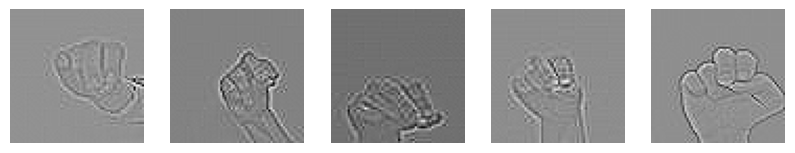

In [ ]:
# prompt: use laplacian of gaussian to detect edges

from skimage.filters import laplace

# Apply Laplacian of Gaussian (LoG) for edge detection
edges = []
for image in images:
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  log_edges = laplace(gray_image, ksize=5)  # Adjust ksize as needed
  log_edges = np.array(log_edges)
  # log_edges = np.concatenate([log_edges[:,:,np.newaxis], log_edges[:,:,np.newaxis],log_edges[:,:,np.newaxis]], axis=2)
  edges.append(log_edges)

images = np.array(edges)
edges = []
# Visualize some of the edge-detected images (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(images[i], cmap='gray')
  plt.axis('off')
plt.show()


In [ ]:
# prompt: using canny detect the edges



# Define the path to the directory containing the image folders
data_dir = '/content/ArASL_Database_54K_Final'

# Initialize empty lists to store images and labels
images = []
labels = []

# Iterate over the subdirectories (classes) in the data directory
for class_name in os.listdir(data_dir):
  class_dir = os.path.join(data_dir, class_name)
  if os.path.isdir(class_dir):
    # Iterate over the images in the class directory
    for image_name in os.listdir(class_dir):
      image_path = os.path.join(class_dir, image_name)
      # Load the image and resize it to a consistent size
      image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      image = cv2.resize(image, (64, 64))  # Adjust the size as needed
      # Apply Canny edge detection
      edges = cv2.Canny(image, 100, 200)  # Adjust thresholds as needed
      # Append the edge-detected image and label to the lists
      image = cv2.resize(edges, (64, 64))
      edges = np.concatenate([image[:,:,np.newaxis], image[:,:,np.newaxis],image[:,:,np.newaxis]], axis=2)
      images.append(edges)
      labels.append(class_name)

# Convert the lists to NumPy arrays for further processing
images = np.array(images)
labels = np.array(labels)

# Print the shapes of the arrays to verify the data loading
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (47455, 64, 64, 3)
Labels shape: (47455,)


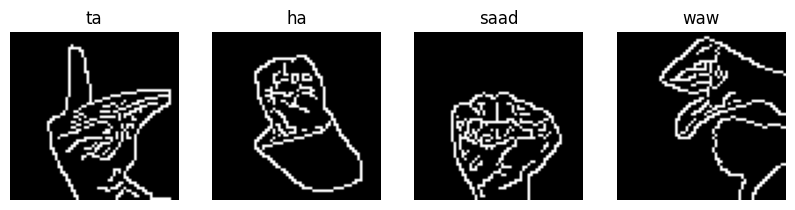

In [ ]:
# prompt: plot 1x4 examples random

import random
plt.figure(figsize=(10, 5))
for i in range(4):
  random_index = random.randint(0, len(images) - 1)
  plt.subplot(1, 4, i + 1)
  plt.imshow(images[random_index], cmap='gray')
  plt.title(labels[random_index])
  plt.axis('off')
plt.show()


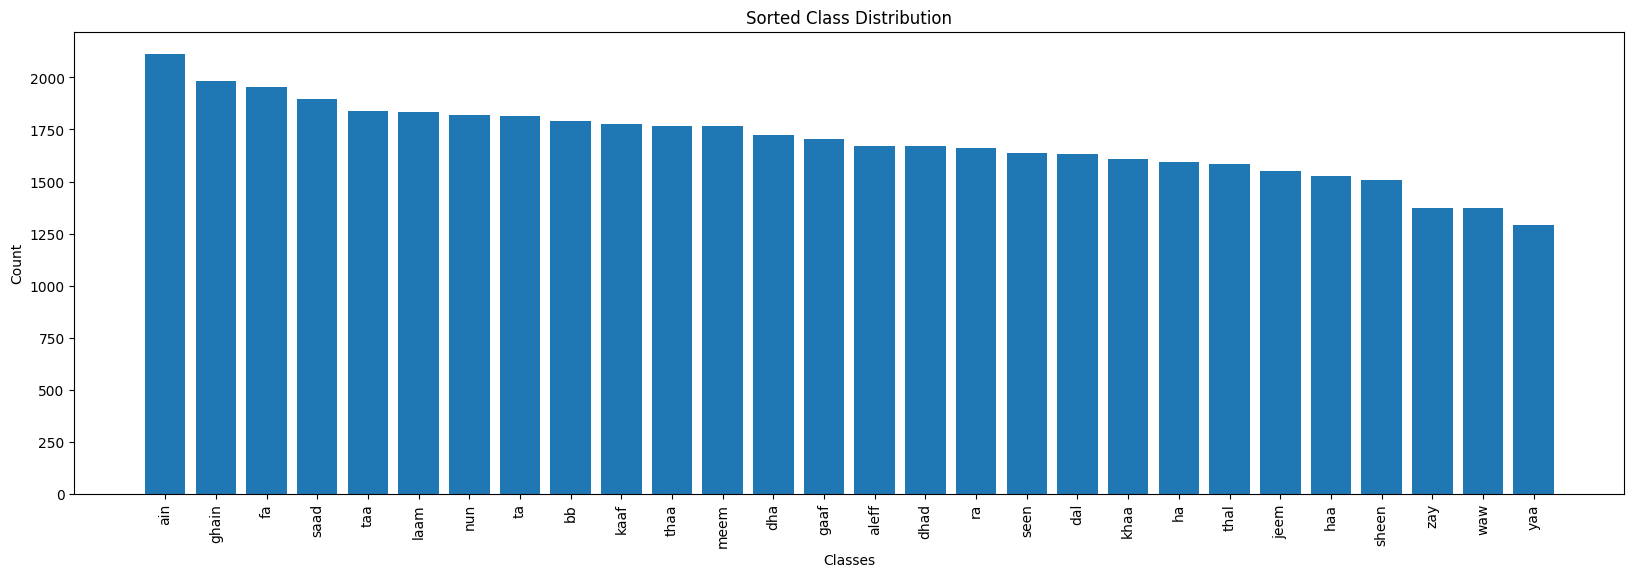

In [ ]:
# prompt: barplot the sorted classes

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
# Count the occurrences of each class
class_counts = Counter(labels)

# Sort the classes by count
sorted_classes = sorted(class_counts, key=class_counts.get, reverse=True)

# Create a bar plot
plt.figure(figsize=(20, 6))
plt.bar(sorted_classes, [class_counts[c] for c in sorted_classes])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Sorted Class Distribution')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# prompt: encode the labels into number

from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the labels and transform them into numerical values
labels_encoded = label_encoder.fit_transform(labels)

# Print the encoded labels
print("Encoded labels:", labels_encoded)


Encoded labels: [ 8  8  8 ... 19 19 19]


In [ ]:
# prompt: split the data into train and test

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.2, random_state=42
)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (37964, 64, 64, 3)
X_test shape: (9491, 64, 64, 3)
y_train shape: (37964,)
y_test shape: (9491,)


In [ ]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with desired augmentation parameters
datagen = ImageDataGenerator(
    zoom_range=0.2,  # Zoom range for random zooming
    rotation_range=20,  # Rotation range in degrees
    height_shift_range=0.1,  # Height shift range as a fraction of total height
    fill_mode='nearest'  # Fill mode for newly created pixels
)

# Fit the generator to the training data
datagen.fit(X_train)

# Generate augmented images and labels
augmented_images = []
augmented_labels = []
for i in range(len(X_train)):
  img = X_train[i]
  label = y_train[i]
  img = img.reshape((1,) + img.shape)  # Reshape to fit generator input
  # Generate batches of augmented images
  for batch in datagen.flow(img, batch_size=1):
    augmented_images.append(batch[0])
    augmented_labels.append(label)
    break  # Generate only one augmented image per original image

# Convert the lists to NumPy arrays
X_train = np.array(augmented_images)
y_train = np.array(augmented_labels)

# Print the shapes of the augmented data
print("Augmented images shape:", X_train.shape)
print("Augmented labels shape:", y_train.shape)


Augmented images shape: (37964, 64, 64, 3)
Augmented labels shape: (37964,)


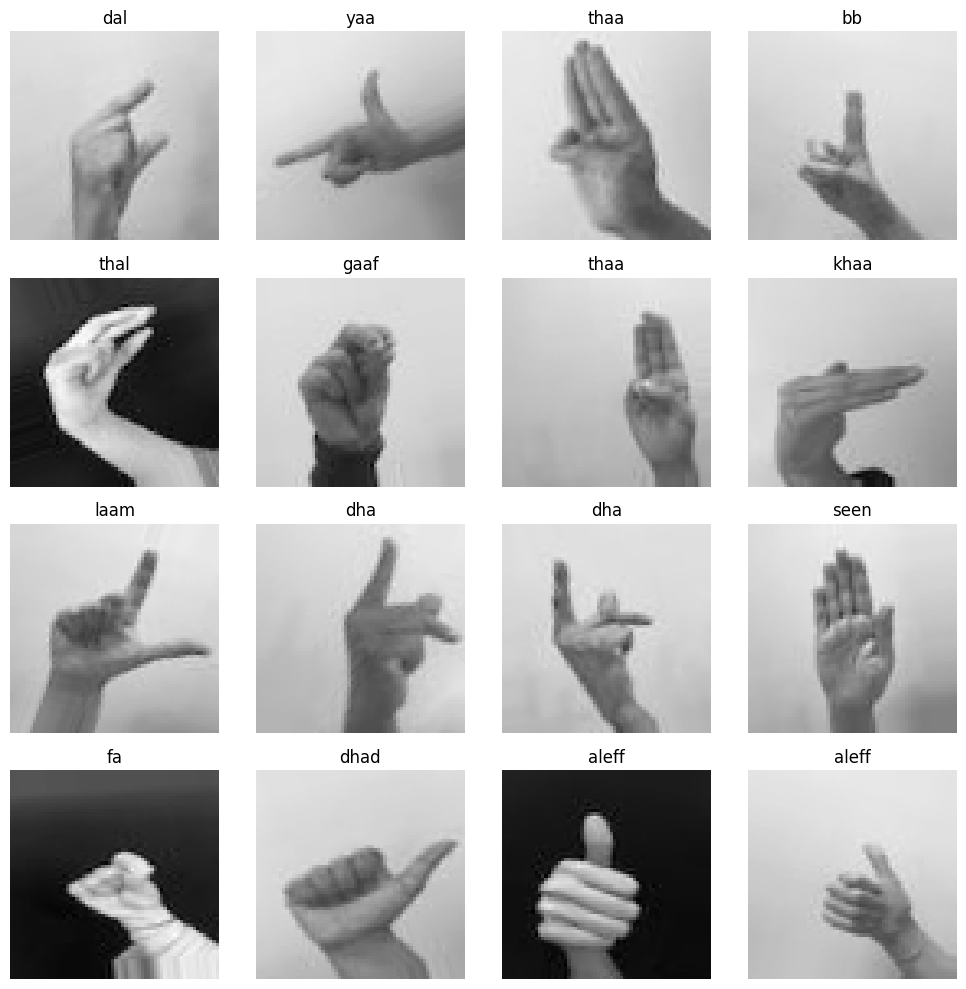

In [ ]:


import matplotlib.pyplot as plt

# Select 16 random samples from the training set
sample_indices = np.random.choice(len(X_train), size=16, replace=False)
sample_images = X_train[sample_indices]
sample_labels = y_train[sample_indices]

# Decode the numerical labels back to original class names
sample_labels_decoded = label_encoder.inverse_transform(sample_labels)

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Display the sample images with their labels
for i, ax in enumerate(axes.flat):
  ax.imshow(sample_images[i].astype('uint8'))  # Convert to uint8 for display
  ax.set_title(sample_labels_decoded[i])
  ax.axis('off')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


In [ ]:
# prompt: create a cnn model to predict and calculate accuracy

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(150, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))  # Adjust epochs as needed

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 282s 235ms/step - accuracy: 0.0413 - loss: 3.3473 - val_accuracy: 0.0432 - val_loss: 3.3274
Epoch 2/30
 524/1187 ━━━━━━━━━━━━━━━━━━━━ 2:23 217ms/step - accuracy: 0.0432 - loss: 3.3279

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-f3dbfd08638a>", line 34, in <cell line: 34>
    model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))  # Adjust epochs as needed
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit
    logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 833, in __call__
    result = self._call(*args, **kwds)
  File "/u

TypeError: object of type 'NoneType' has no len()

297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


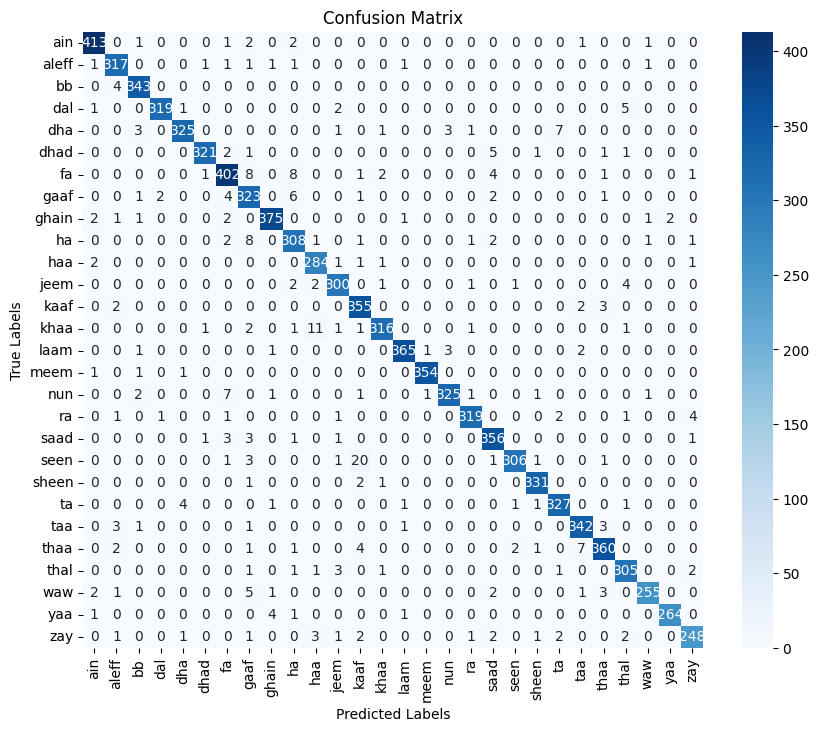

In [ ]:
# prompt: calculate and plot the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


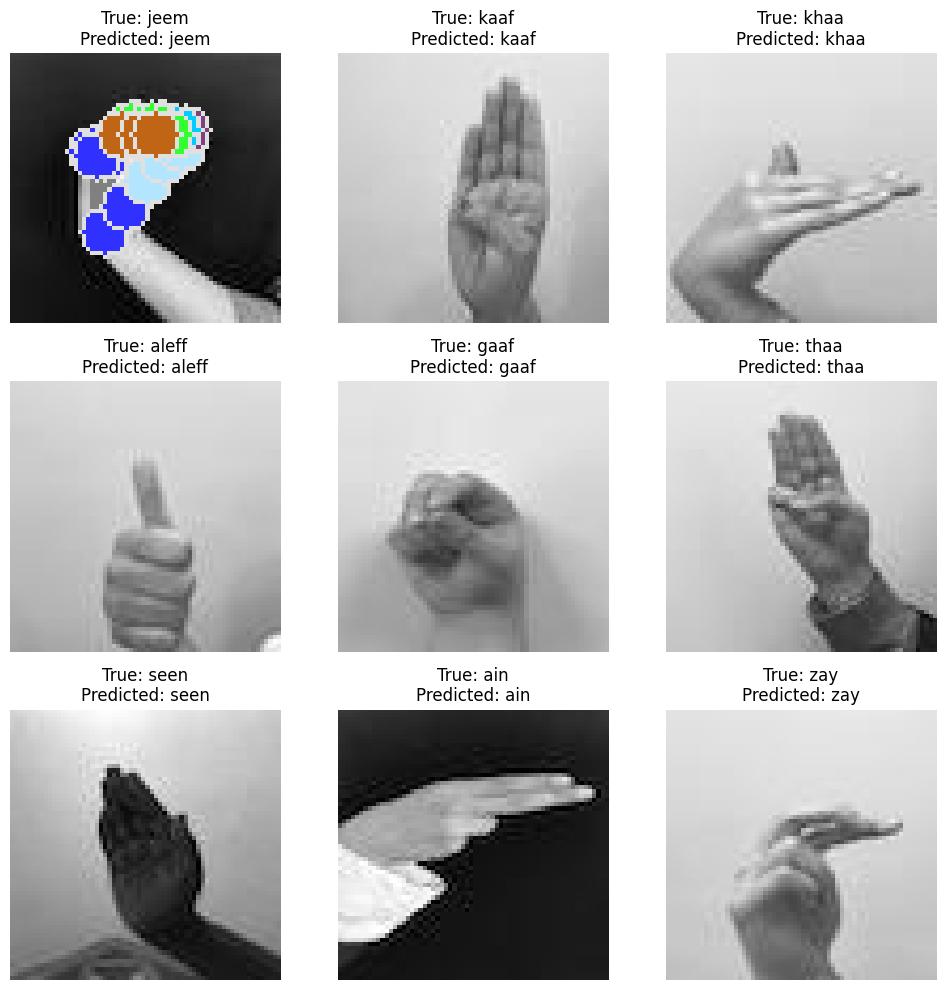

In [ ]:
# prompt: plot some test examples

# Select a few random samples from the test set
sample_indices = np.random.choice(len(X_test), size=9, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# Predict classes for the sample images
sample_predictions = model.predict(sample_images)
sample_predicted_classes = np.argmax(sample_predictions, axis=1)

# Decode the numerical labels back to original class names
sample_labels_decoded = label_encoder.inverse_transform(sample_labels)
sample_predicted_classes_decoded = label_encoder.inverse_transform(sample_predicted_classes)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Display the sample images with their true and predicted labels
for i, ax in enumerate(axes.flat):
  ax.imshow(sample_images[i].astype('uint8'))  # Convert to uint8 for display
  true_label = sample_labels_decoded[i]
  predicted_label = sample_predicted_classes_decoded[i]
  ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
  ax.axis('off')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


In [ ]:
# prompt: use pretrained resnet152 to rain

from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet152 model (excluding top classification layers)
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)  # Output layer with number of classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))  # Adjust epochs as needed

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/10
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 59s 49ms/step - accuracy: 0.9642 - loss: 0.1061 - val_accuracy: 0.8787 - val_loss: 0.5464
Epoch 2/10
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.9613 - loss: 0.1153 - val_accuracy: 0.8900 - val_loss: 0.5044
Epoch 3/10
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.9664 - loss: 0.0993 - val_accuracy: 0.8810 - val_loss: 0.6281
Epoch 4/10
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9722 - loss: 0.0869 - val_accuracy: 0.9048 - val_loss: 0.4877
Epoch 5/10
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 55s 47ms/step - accuracy: 0.9689 - loss: 0.0867 - val_accuracy: 0.8862 - val_loss: 0.5890
Epoch 6/10
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.9702 - loss: 0.0921 - val_accuracy: 0.9032 - val_loss: 0.5407
Epoch 7/10
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 91s 55ms/step - accuracy: 0.9792 - loss: 0.0622 - val_accuracy: 0.9070 - val_loss: 0.5243
Epoch 8/10
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.9744 -

In [ ]:
# prompt: export the model and save it in drive

from google.colab import drive
drive.mount('/content/drive')

# Save the model to your Google Drive
model.save('/content/drive/MyDrive/sign_language_model.keras')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.applications import ResNet50,ResNet152, ResNet152V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

# Load the ResNet50 model with pre-trained weights
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(64,64, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Build the new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='sigmoid'))

# Compile the model
# model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


Epoch 1/30


ValueError: Exception encountered when calling Functional.call().

[1mKernel shape must have the same length as input, but received kernel of shape (7, 7, 70, 64) and input of shape (None, 70, 70).[0m

Arguments received by Functional.call():
  • args=('<KerasTensor shape=(None, 64, 64), dtype=float32, sparse=None, name=keras_tensor_1555>',)
  • kwargs={'mask': 'None'}

In [ ]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


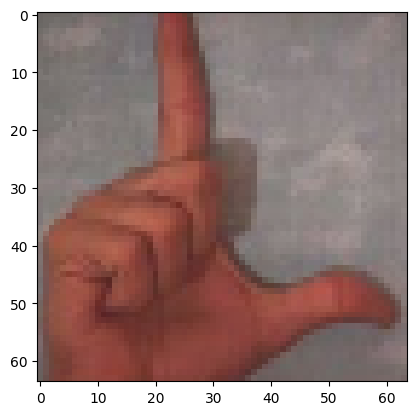

In [ ]:
# prompt: get the sub images that contain the hands and the sub images should be squared images

import cv2
import mediapipe as mp

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

image = cv2.imread('/content/hd8.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = hands.process(image_rgb)

subImgs = []

if results.multi_hand_landmarks:
  for hand_landmarks in results.multi_hand_landmarks:
    # Get the bounding box coordinates
    x_coords = [landmark.x for landmark in hand_landmarks.landmark]
    y_coords = [landmark.y for landmark in hand_landmarks.landmark]
    x_min = int(min(x_coords) * image.shape[1])
    y_min = int(min(y_coords) * image.shape[0])
    x_max = int(max(x_coords) * image.shape[1])
    y_max = int(max(y_coords) * image.shape[0])

    # Calculate the side length for a square sub-image
    side_length = max(x_max - x_min, y_max - y_min)

    # Calculate the center of the bounding box
    center_x = (x_min + x_max) // 2
    center_y = (y_min + y_max) // 2

    # Calculate the top-left corner of the square sub-image
    new_x_min = max(0, center_x - side_length // 2)
    new_y_min = max(0, center_y - side_length // 2)
    new_x_max = min(image.shape[1], center_x + side_length // 2)
    new_y_max = min(image.shape[0], center_y + side_length // 2)


    # Extract the square sub-image containing the hand
    hand_image = image[new_y_min:new_y_max, new_x_min:new_x_max]

    # Resize the sub-image to a fixed size (if necessary)
    hand_image = cv2.resize(hand_image, (64, 64))


    subImgs.append(hand_image)

    # Display the extracted hand image
    plt.imshow(cv2.cvtColor(hand_image, cv2.COLOR_BGR2RGB))
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


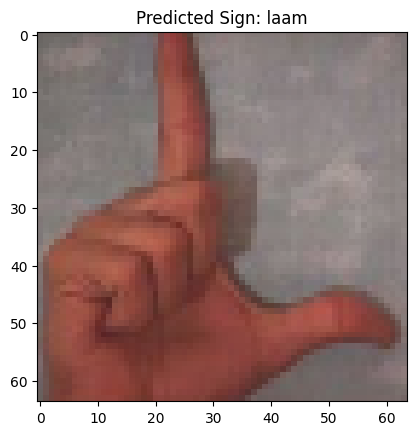

In [ ]:
# prompt: feed the images to the model and predict the sign language and print the image

if subImgs:
  for hand_image in subImgs:
    # Preprocess the image (resize, normalize, etc.)
    img = cv2.resize(hand_image, (64, 64))
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Get the predicted label
    predicted_label = label_encoder.classes_[predicted_class]

    # Display the image with the prediction
    plt.imshow(cv2.cvtColor(hand_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Sign: {predicted_label}")
    plt.show()
else:
  print("No hands detected in the image.")


In [ ]:
# prompt: save label_encoder to drive

import pickle
from google.colab import drive

# drive.mount('/content/drive')

# Save the label encoder to your Google Drive
with open('/content/drive/MyDrive/label_encoder.pkl', 'wb') as f:
  pickle.dump(label_encoder, f)
